Choose a datasets: 
 1 -> AMOCO_HN 
 2 -> provaADM1 
 3 -> bsm2 
 4 -> matlab
Data are from: amoco_HN
C:\Users\fede1\OneDrive - Politecnico di Milano\Documenti\GitHub\AD-OCS\Working_data
mu1,max: 0.3179441566590626; Ks1:  0.3934383020566712; Cd1: 0.07145038157763807
mu2,max: 0.1395227951114702; Ks2:  3.0523454127694714; KI2: 199.2865903880199; Cd2: 0.17302628019377272
k1: [18.89428158], intercept: 0.614474830334951
k2: [815.32471023], intercept: -5.079308170919209
k3: [956.2605334], intercept: -5.079308170919209
k4: [10.46146164], intercept: 0.0
k5: [191.38876052], intercept: 0.0
k6: [252.89930627], intercept: 0.7546849933824298
k_hyd: [5.00241138], intercept: -0.6685035332106093
kLa: [23.21029151],     intercept: 2.6833587136628143,

 STEADY STATE VALUES 

S.S. of XT   0.3166804680877583
S.S. of X1   1.149200718776252
S.S. of X2   0.9585206009329962
S.S. of Z    239.74788220447437
S.S. of S1   0.11666640593408327
S.S. of S2   3.5322754028707064
S.S. of C    241.59698721271675
S.S. of 

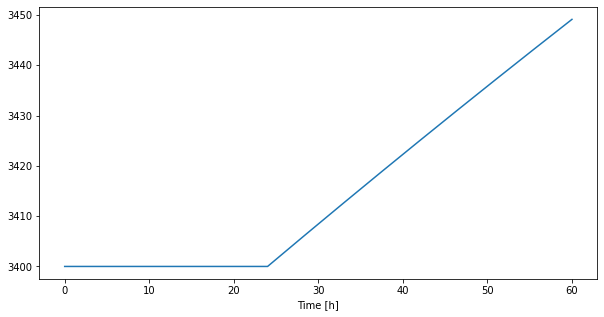

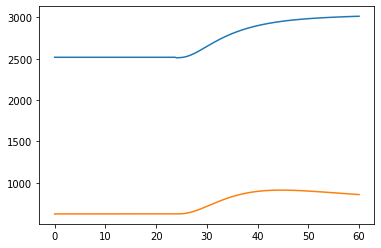

In [1]:
from main_6_3 import *
from functions import *

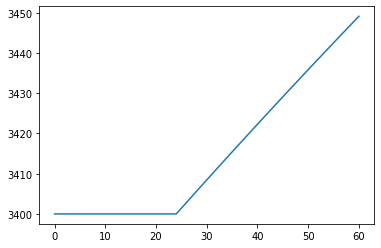

In [3]:
plt.plot(t_span, V_liq)

In [5]:
n_o2 = digester_out['O2']
x_o2 = n_o2/(digester_out['CH4']+digester_out['CO2']+digester_out['H2S']+digester_out['O2']+digester_out['H2O']) #[-]
C_o2 =  x_o2* 1/Rgas_L_atm_K/(T+273.15) # [mol/L]
w_O2 = C_o2*0.032 # [mg/L]
I_O2 = 1/(1+w_O2/3.29)
Ch4_inh = digester_out['CH4']*I_O2

In [9]:
w_O2

0      3.014467e-07
1      3.014467e-07
2      3.014467e-07
3      3.014467e-07
4      3.014467e-07
           ...     
223    9.461823e-07
224    9.463631e-07
225    9.465365e-07
226    9.467028e-07
227    9.468625e-07
Length: 228, dtype: float64

In [8]:
sol_O2 = np.exp(-171.2542 + 8391.24/(T+273.15) + 23.24323*np.log(T+273.15)) # [-]   - Mole fraction of dissolved oxygen in water at [T]°C (273 K-353 K)
H_O2_atm = 1/sol_O2 # [atm] - Henry's constant oxygen at [T]°C - Partial Pressure Relation
n_o2 = digester_out['O2']
y_O2 = n_o2/(digester_out['CH4']+digester_out['CO2']+digester_out['H2S']+digester_out['O2']+digester_out['H2O'])
x_O2 = y_O2/H_O2_atm # [-] - Mole fraction of oxygen in the liq
C_O2 =  x_O2* 1/0.0821/(T+273.15) # mol/L
w_O2 = C_O2*0.0032
I_O2 = 1/(1+w_O2/3.2938)
Ch4_inh = digester_out['CH4']*I_O2

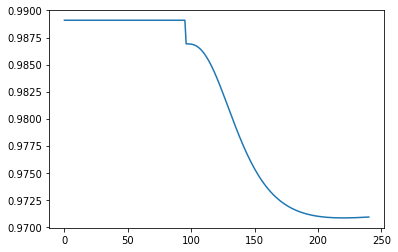

In [10]:
plt.plot(t_span, q_M

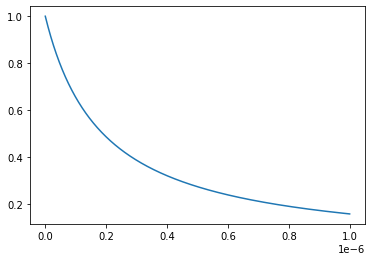

In [43]:
S_O = np.linspace(0, 1e-6, 1000)
I_O2 = 1/(1+S_O/1.9e-7)
plt.plot(S_O, I_O2)

In [35]:
x_O2

0      4.793246e-09
1      4.793246e-09
2      4.793246e-09
3      4.793246e-09
4      4.793246e-09
           ...     
568    1.637857e-08
569    1.637978e-08
570    1.638098e-08
571    1.638216e-08
572    1.638332e-08
Length: 573, dtype: float64

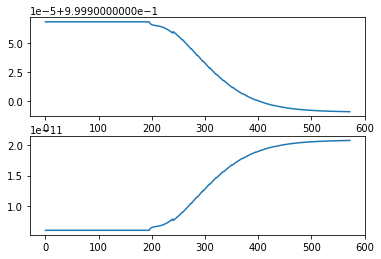

In [30]:

plt.subplot(2,1,1)
plt.plot(I_O2)
plt.subplot(2,1,2)
plt.plot(w_O2)

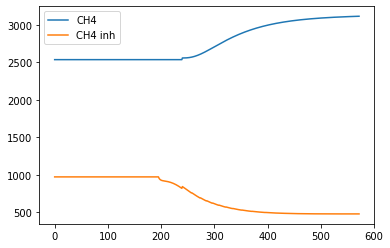

In [19]:
plt.plot(digester_out['CH4'], label='CH4')
plt.plot(Ch4_inh, label='CH4 inh')
plt.legend()

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

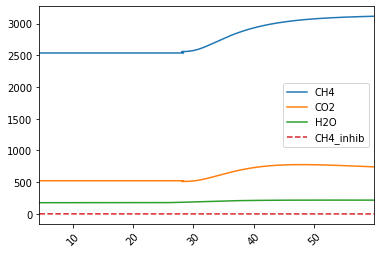

In [5]:


plt.plot(digester_out['t'], digester_out['CH4'],  label='CH4')
plt.plot(digester_out['t'], digester_out['CO2'], label='CO2')
plt.plot(digester_out['t'], digester_out['H2O'], label='H2O')
plt.plot(digester_out['t'], digester_out['CH4,inhib'], '--', label='CH4_inhib')
plt.legend()
plt.xlim([digester_out['t'].min(), digester_out['t'].max()])
plt.xticks(rotation=45)



In [2]:
digester_out['efficiency'] = (1-digester_out['H2S'] / N_V[0:len(digester_out),2])*100

NameError: name 'digester_out' is not defined

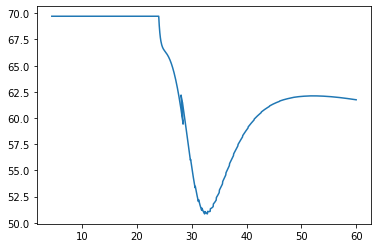

In [5]:
plt.plot(digester_out['t'], digester_out['efficiency'], label='efficiency')

KeyError: 'CH4'

In [17]:
digester_out.loc[digester_out['t_in']>24]


,t_in,t,CH4,CO2,H2S,H2O,O2,r_avg,efficiency
481,24.05,28.103686,2558.838122,512.009166,1.815452,184.165162,0.999043,10.439078,62.022969
482,24.10,28.152739,2558.891109,512.022504,1.823675,184.315443,1.003398,10.454448,61.852560
483,24.15,28.201782,2558.948146,512.038062,1.832022,184.466688,1.007820,10.470281,61.679842
484,24.20,28.250814,2559.011111,512.056865,1.840493,184.618861,1.012311,10.486590,61.504962
485,24.25,28.299831,2559.081788,512.079888,1.840487,184.618855,1.012307,10.513657,61.507961
...,...,...,...,...,...,...,...,...,...
1140,57.00,59.784106,3115.003754,742.788668,6.205816,217.897380,3.366110,38.239273,61.757808
1141,57.05,59.833523,3115.119485,742.597253,6.206013,217.893887,3.366166,38.241322,61.753948
1142,57.10,59.882941,3115.234702,742.405957,6.206208,217.890392,3.366220,38.243349,61.750075
1143,57.15,59.932359,3115.349408,742.214784,6.206400,217.886895,3.366272,38.245354,61.746189


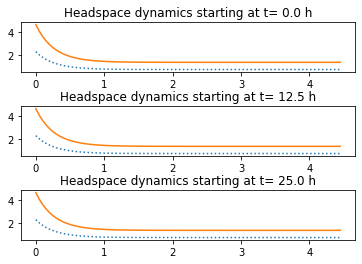

In [23]:
samples = [0,250,500]
for ind in range(len(samples)):
    plt.subplot(len(samples),1,ind+1)
    plt.title(('Headspace dynamics starting at t= %s h' % t_span[samples[ind]]))
    plt.plot(headspace_dict[ind]['t_cstr'],headspace_dict[ind]['H2S'], color = 'tab:orange')
    plt.plot(headspace_dict[ind]['t_cstr'],headspace_dict[ind]['O2'],':', color = 'tab:blue')
    ind+1
plt.subplots_adjust(hspace=0.7)